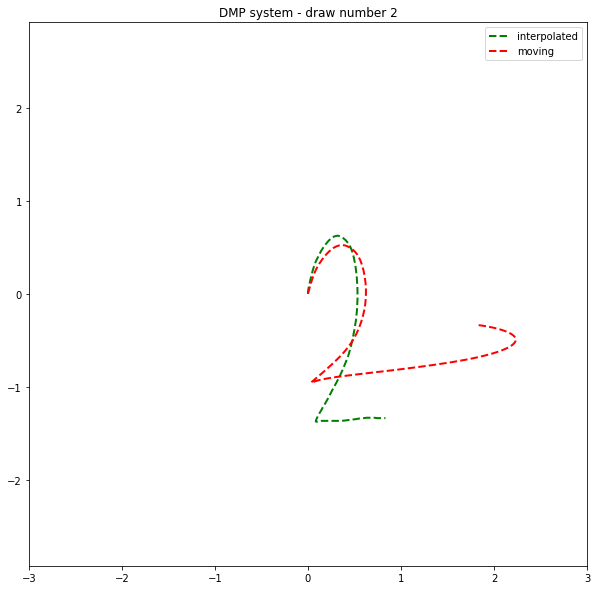

In [1]:
"""
Copyright (C) 2016 Travis DeWolf

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

Modified: Xiyang Yeh
"""

import numpy as np
import matplotlib.pyplot as plt

import dmp_pkg.dmp_discrete

y_des = np.load("./resource/2.npz")["arr_0"].T
y_des -= y_des[:, 0][:, None]

# test normal run
dmp = dmp_pkg.dmp_discrete.DMPs_discrete(n_dmps=2, n_bfs=500, ay=np.ones(2) * 10.0)
y_track = []
dy_track = []
ddy_track = []

y_interp = dmp.imitate_path(y_des=y_des)

plt.figure(1, figsize=(10, 10))
plt.plot(y_des[0, :], y_interp[1, :], "g--", lw=2, label="interpolated")

# run while moving the target up and right
y_track = []
dmp.reset()
for t in range(dmp.timesteps):
    y, _, _ = dmp.step()
    y_track.append(np.copy(y))
    # move goal
    dmp.goal += np.array([1e-2, 1e-2])

# continue to step until we stabilize
for t in range(5000):
    y, _, _ = dmp.step()
    y_track.append(np.copy(y))
    if(np.linalg.norm(y-dmp.goal) < 1e-4):
        break

y_track = np.array(y_track)

plt.plot(y_track[:, 0], y_track[:, 1], "--r", lw=2, label="moving")
plt.legend()
plt.title("DMP system - draw number 2")

plt.axis("equal")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()
